__Capstone Project - The Battle of Neighborhoods:__

This solution is an attempt to leverage __Four Square Location Service Provider API__ to address a unique problem applying learnings from earlier practical sessions. 

__Problem Intuition:__

Mr.John is 65 year old person who has decided to __move-in to an apartment__ with his wife Mrs.John to a new location among the below considerations in city of Toronto:

- Downtown Toronto
- East Toronto
- West Toronto
- Central Toronto

One key requirement for this beautiful old couple is the __vicinity of Hospitals__ from their new location. Both of them have pre exisiting medical conditions. 

Mr.John - a __heart patient__ and his requirement is that the new location should be nearer to __heart speciality hospitals.__

Mrs.John has been visiting __Toronto General Hospitals__ for past few years and she needs atleast one among these hospitals accessible from the new location. 

Apart from this condition, they are flexible enough to handle other requirements. 

They need our help to __suggest them an apt location__ as near as possible according to above conditions, so that they can move without any hesitation and also continue to take their treatments in this old age without any hassle. 

__Importing necessary Libraries:__

In [1]:
import pandas as pd
from pandas import json_normalize
#!pip install geocoder
import geocoder
#!pip install geopy
from geopy.geocoders import Nominatim
import folium # map rendering library
import requests #REST operation
import matplotlib as mpl
import matplotlib.pyplot as plt

__Creating Pandas Dataframe with Toronto Neighbourhood from extracted Table:__ 

In [2]:
toronto_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')[0]
toronto_df.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


Rows without borough values are not considered. Removing missing values:

In [3]:
#Ignore without a borough
#toronto_df.drop(toronto_df.loc[toronto_df['Borough'] == 'Not assigned'])
toronto_df = toronto_df[toronto_df['Borough'] != 'Not assigned'].reset_index(drop=True)
toronto_df.head()

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [4]:
toronto_df.shape

(103, 3)

Read __Coordinates__ details from CSV into a dataframe. In order to execute a merge we rename the common column to same value as toronto dataset:

In [5]:
coordinates_df = pd.read_csv('/Users/baraths/Documents/DataScience_Course_Online/Data Science - Full Courses/Jupyter Notebook files/Geospatial_Coordinates.csv')
coordinates_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [6]:
toronto_df = toronto_df.merge(coordinates_df, on='Postal Code')
toronto_df.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


According to the Location requirement from Mr.John, we slice it and reduce scope to only those __boroughs from given location:__

In [7]:
#Get Borough which contains string toronto - Slicing to reduce count
toronto_df = toronto_df[toronto_df['Borough'].str.contains("Toronto")].reset_index(drop=True)
toronto_df.head()
#toronto_df['Borough'].unique()


,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031


__Plot to show number of Boroughs in scope:__

We can see there are __39__ boroughs with most of them in __Downtown Toronto__

In [8]:
grp = toronto_df.groupby('Borough').count()
grp = grp['Neighbourhood']

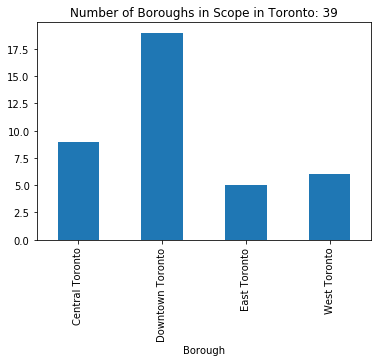

In [9]:
grp.plot(kind = 'bar')
plt.title('Number of Boroughs in Scope in Toronto: '+str(toronto_df.shape[0]))
plt.show()

__Creating the Map and Plotting from above locations:__

This gives an overall idea of the area we are looking at:

The coordinates are determined using __Nominatim function from geopy:__

In [10]:
#Get lat and lon of location: 
address = 'Toronto, Ontario, Canada'

geolocator = Nominatim(user_agent="toronto_explorer") #some agent name for format
location = geolocator.geocode(address) #apply geocode inside Nominatim object
#print(location) #actual location

latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


The Map is plotted using __Folium and Circular markers__ are inserted.

In [11]:
# create map of Toronto using latitude and longitude values - from narrow down locations:
map_torronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_df['Latitude'], toronto_df['Longitude'], toronto_df['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_torronto)  
    
map_torronto

__Access Four Square API Location Service Provider:__

In [12]:
CLIENT_ID = 'VHDJ4AITZWVPERLLXXLARXLWTBVKJMPHDO1PQMENORJ1R5Q2' # your Foursquare ID
CLIENT_SECRET = 'G3FTTGEVNZCPFXLNSK5MZJBV4DC12Q3JCZWCR5RBAKEQT0HT' # your Foursquare Secret
#ACCESS_TOKEN = 'SNPKEDJV1HNCC0JAAWEKA3LF0X3KSTRPJUPQNAYC3BBDLSX0' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

neighborhood_latitude = toronto_df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto_df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = toronto_df.loc[0, 'Neighbourhood'] # neighborhood name

#print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name,neighborhood_latitude, neighborhood_longitude))

Your credentails:
CLIENT_ID: VHDJ4AITZWVPERLLXXLARXLWTBVKJMPHDO1PQMENORJ1R5Q2
CLIENT_SECRET:G3FTTGEVNZCPFXLNSK5MZJBV4DC12Q3JCZWCR5RBAKEQT0HT


We are using a search query parameter here to search for hospitals very near - say 500 metres to our venues:

In [13]:
search_query = 'Hospital' #Any type of category
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 #in distance metres


# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT,
search_query)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=VHDJ4AITZWVPERLLXXLARXLWTBVKJMPHDO1PQMENORJ1R5Q2&client_secret=G3FTTGEVNZCPFXLNSK5MZJBV4DC12Q3JCZWCR5RBAKEQT0HT&v=20180604&ll=43.6542599,-79.3606359&radius=500&limit=100&query=Hospital'

__Get the Results of the venues by GET results:__

In [14]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fc866f2fd19011cb8f078e6'},
 'response': {'warning': {'text': 'There aren\'t a lot of results for "Hospital." Try something more general, reset your filters, or expand the search area.'},
  'headerLocation': 'Corktown',
  'headerFullLocation': 'Corktown, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'query': 'hospital',
  'totalResults': 2,
  'suggestedBounds': {'ne': {'lat': 43.6587599045, 'lng': -79.3544279001486},
   'sw': {'lat': 43.6497598955, 'lng': -79.36684389985142}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c45addf429a0f47b16b4a1e',
       'name': 'Bay Cat Hospital',
       'location': {'address': '525 King St East',
        'lat': 43.655393,
        'lng': -79.35854,
        'labeledLatLngs': [{'label':

Based on Position in JSON, The other category details are collected

In [15]:
#These 2 cells are common in extraction
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [16]:
#Extracting Venues from JSON file:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns by removing . and take last value:
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]


__Find Near by Venues for our selected location:__

In [17]:
#Extracting Venues - for all the Places
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            search_query)
            
        # make the GET request - with the necessary key path
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
#Venues in Boroughs - containing string toronto:
toronto_df_venues = getNearbyVenues(names=toronto_df['Neighbourhood'],
                                   latitudes=toronto_df['Latitude'],
                                   longitudes=toronto_df['Longitude']
                                  )
#toronto_df_venues.head()

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
R

In [19]:
toronto_df_venues.shape

(66, 7)

__Selecting locations to satisfy conditions:__

The next step is quite critical. 

We are selecting locations by filtering using the conditions given by Mr and Mrs.John. 

For Mr.John we filter __heart speciality hospitals__ and for Mrs.John we filter __torronto general hospitals__ among the selected venues.

In [20]:
t_heart = toronto_df_venues[toronto_df_venues['Venue'].str.contains('Heart') | toronto_df_venues['Venue'].str.contains('card')]
t_general = toronto_df_venues[toronto_df_venues['Venue'].str.contains('General')]

toronto_df_venues = pd.concat([t_heart,t_general]).reset_index(drop = True)
toronto_df_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Richmond, Adelaide, King",43.650571,-79.384568,"Heart Failure Clinic, Robert McRae Heart Healt...",43.652325,-79.379264,Hospital
1,"Kensington Market, Chinatown, Grange Park",43.653206,-79.400049,Toronto Western nuclear cardiology,43.653405,-79.405008,Hospital
2,"First Canadian Place, Underground city",43.648429,-79.382280,"Heart Failure Clinic, Robert McRae Heart Healt...",43.652325,-79.379264,Hospital
3,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Toronto General Hospital,43.658762,-79.388292,Hospital
4,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Toronto General Hospital Emergency Room,43.658426,-79.386462,Hospital
5,Central Bay Street,43.657952,-79.387383,Toronto General Hospital,43.658762,-79.388292,Hospital
6,Central Bay Street,43.657952,-79.387383,R. Fraser Elliot Building - Toronto General Ho...,43.658109,-79.386759,Hospital
7,Central Bay Street,43.657952,-79.387383,Toronto General Hospital Emergency Room,43.658426,-79.386462,Hospital


__Neighborhoods which match:__

In [21]:
#Getting how many places exist based on Neighborhood
grp_nh = toronto_df_venues.groupby('Neighborhood').count()
grp_nh[['Venue']]

,Venue
Neighborhood,
Central Bay Street,3
"First Canadian Place, Underground city",1
"Kensington Market, Chinatown, Grange Park",1
"Queen's Park, Ontario Provincial Government",2
"Richmond, Adelaide, King",1


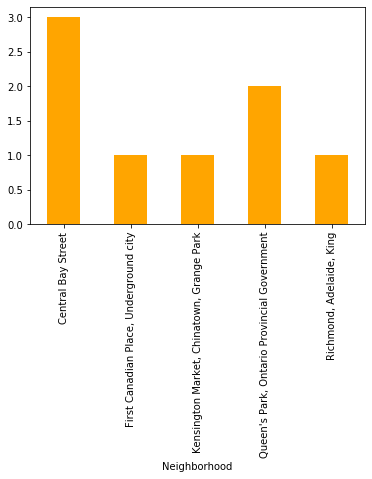

In [22]:
grp_nh = grp_nh['Venue']
grp_nh.plot(kind = 'bar',color = 'orange')
plt.show()

__Geo Locations that are considered to be near to:__

Let us plot the selected locations that need to be near to get an idea where the new location can be:

In [23]:
# Plot geo locations of hospitals filtered using latitude and longitude values
map_torronto_hospital = folium.Map(location=[latitude, longitude], zoom_start=14)

# add markers to map
for lat, lng, label in zip(toronto_df_venues['Neighborhood Latitude'], toronto_df_venues['Neighborhood Longitude'], toronto_df_venues['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        #fill_color='#3186cc',
        fill_color='blue',
        fill_opacity=0.4,
        parse_html=False).add_to(map_torronto_hospital)  
     
print(type(lat))    
map_torronto_hospital

<class 'float'>


__Calculating Nearest location to all geo locations:__

If accuracy is the key criteria of the project, then we may need to apply the concept of __Great Arcs - Haversine distance__. As our locations in this particular area are not very far from each other, we can roughly consider earth is a plane and estimate the new location by detrmining the __centroid__ of the surrounding geo location coordinates.  

In [24]:
#Calculate the nearest area to all the geolocations
L = [(43.650571, -79.384568), 
 (43.653206, -79.400049), 
 (43.648429, -79.382280),
 (43.662301, -79.389494),
 (43.657952, -79.387383)]

lat = []
long = []
for l in L :
    lat.append(l[0])
    long.append(l[1])

nearest_latitude = float(sum(lat)/len(lat))
nearest_longitude = float(sum(long)/len(long))
print(nearest_latitude, nearest_longitude)

43.6544918 -79.3887548


__Plot Identified location:__
  
Let us plot identified location along with the selected hospitals:

In [25]:
# create map of Manhattan using latitude and longitude values
map_torronto_hospital = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, label in zip(toronto_df_venues['Neighborhood Latitude'], toronto_df_venues['Neighborhood Longitude'], toronto_df_venues['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [nearest_latitude, nearest_longitude],
        radius=70,
        popup=label,
        color='red',
        parse_html=False).add_to(map_torronto_hospital)
    
for lat, lng, label in zip(toronto_df_venues['Neighborhood Latitude'], toronto_df_venues['Neighborhood Longitude'], toronto_df_venues['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='blue',
        fill=True,
        #fill_color='#3186cc',
        fill_color='blue',
        fill_opacity=0.4,
        parse_html=False).add_to(map_torronto_hospital)  
    

    
map_torronto_hospital

We can see that __St.Patricks near Central Bay__ would be a great location from where both __Heart Speciality Clinics and Toronto General Hospitals__ are conveniently accessible. Mr and Mrs.John would be happy to move to this kind of a place. 

The use of location data to explore a geographical location is quite a handy and effective tool to solve specific problems like above. 

__Thank you!__